In [32]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['legend.fontsize'] = 15

# matplotlib.style.use(Path('../style.mplstyle'))

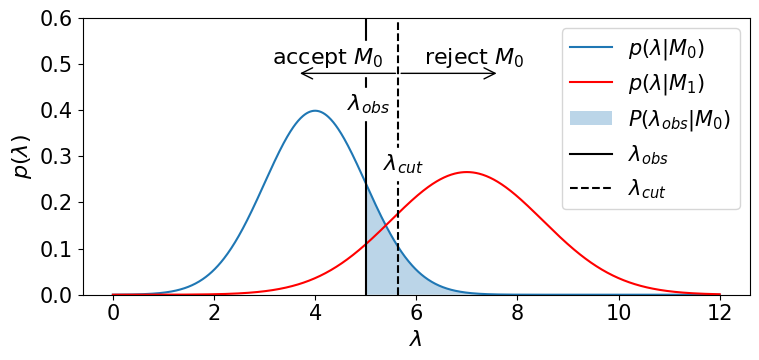

In [39]:
x = np.linspace(0, 12, 1000)

fig, ax = plt.subplots(figsize=(8,4))
fig.set_tight_layout("rect")

ax.plot(x, sp.stats.norm.pdf(x,4,1), label=r'$p(\lambda|M_0)$')
ax.plot(x, sp.stats.norm.pdf(x, 7, 1.5), 'r', label=r'$p(\lambda|M_1)$')

# Shade the region under the Gaussian curve
gx = np.linspace(5, 10, 100)
plt.fill_between(gx, sp.stats.norm.pdf(gx, 4, 1), alpha=0.3, label = r'$P(\lambda_{obs}|M_0)$')
# gx = np.linspace(0, 5, 100)
# plt.fill_between(gx, sp.stats.norm.pdf(gx, 7, 1.5), alpha=0.3, label = r'$1-P(t_{obs}|H_1)$')


# # Shade the region under the Gaussian curve
# gx = np.linspace(0, 5, 100)
# plt.fill_between(gx, sp.stats.norm.pdf(gx, 7, 1.5), alpha=0.3)

ax.axvline(x = 5, label = r'$\lambda_{obs}$', color='k')
ax.text(5-0.36, 0.4, r'$\lambda_{obs}$', backgroundcolor='white', fontsize=16)

# ax.text(6, 0.1, r'$P(\lambda_{obs}|M_0)$', fontsize=16)
# ax.annotate("", xy=(5.8, 0.02), xytext=(7.0, 0.08), arrowprops=dict(arrowstyle="->"))

# ax.text(2.6, 0.1, r'$1-P(t_{obs}|H_1)$')
# ax.annotate("", xy=(4.4, 0.03), xytext=(3.5, 0.08), arrowprops=dict(arrowstyle="->"))

t_cut = sp.stats.norm.ppf(1-0.05, 4, 1)

plt.axvline(t_cut, linestyle='--', color='k', label = r'$\lambda_{cut}$')
ax.text(t_cut-0.3, 0.27, r'$\lambda_{cut}$', backgroundcolor='white', fontsize=16)

ax.text(t_cut-2.5, 0.5, r'accept $M_0$', fontsize=16, backgroundcolor='white')
ax.text(t_cut+0.5, 0.5, r'reject $M_0$', fontsize=16, backgroundcolor='white')
ax.annotate("", xy=(t_cut-2, 0.48), xytext=(t_cut, 0.48), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(t_cut+2, 0.48), xytext=(t_cut, 0.48), arrowprops=dict(arrowstyle="->"))



ax.set_ylim((0,0.6))
# extraticks = [5]
# ax.set_xticks(list(ax.get_xticks()) + [6.5], labels=list(ax.get_xticklabels())+[r'$t_{cut}$'])


ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$p(\lambda)$')
ax.legend()

plt.savefig('../plots/hypo.pdf', bbox_inches='tight')